In [1]:
# kto_201901.xlsx 엑셀 데이터 불러오기
import pandas as pd 
kto_201901 = pd.read_excel('./files/kto_201901.xlsx', 
                          header=1,         #컬럼이름은 두번빼 줄에 위치
                          usecols='A:G',    #컬럼은 A부터 G까지
                          skipfooter=4)     #마지막 4개의 row는 불러오지 않는다.
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [2]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [3]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [4]:
condition = (kto_201901['관광'] == 0 )\
             |(kto_201901['상용'] == 0 )\
             |(kto_201901['공용'] == 0) \
             |(kto_201901['유학/연수'] == 0 )
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [5]:
# 기준년월 컬럼 생성
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [6]:
# 나라가 몇개가 있는지 체크

nation=(kto_201901['국적'].unique())
print(nation,len(nation))

['아시아주' '일본' '대만' '홍콩' '마카오' '태국' '말레이시아' '필리핀' '인도네시아' '싱가포르' '미얀마' '베트남'
 '인도' '스리랑카' '파키스탄' '방글라데시' '캄보디아' '몽골' '중국' '이란' '이스라엘' '터키' '우즈베키스탄'
 '카자흐스탄' 'GCC' '아시아 기타' '미주' '미국' '캐나다' '멕시코' '브라질' '미주 기타' '구주' '영국' '독일'
 '프랑스' '네덜란드' '스웨덴' '스위스' '이탈리아' '덴마크' '노르웨이' '벨기에' '오스트리아' '스페인' '그리스'
 '포르투갈' '핀란드' '아일랜드' '우크라이나' '러시아' '크로아티아' '루마니아' '불가리아' '폴란드' '구주 기타'
 '대양주' '오스트레일리아' '뉴질랜드' '대양주 기타' '아프리카주' '남아프리카공화국' '아프리카 기타' '기타대륙'
 '국적미상' '교포소계' '교포'] 67


In [7]:
# 제거할 대륙명 선정하기 
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
# 대륙목록 해당 값 삭제하기
# 들어가있으면 false를 적어라.
condition = (kto_201901.국적.isin(continents_list)==False) 
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique

<bound method Series.unique of 1           일본
2           대만
3           홍콩
4          마카오
5           태국
6        말레이시아
7          필리핀
8        인도네시아
9         싱가포르
10         미얀마
11         베트남
12          인도
13        스리랑카
14        파키스탄
15       방글라데시
16        캄보디아
17          몽골
18          중국
19          이란
20        이스라엘
21          터키
22      우즈베키스탄
23       카자흐스탄
24         GCC
25      아시아 기타
27          미국
28         캐나다
29         멕시코
30         브라질
31       미주 기타
33          영국
34          독일
35         프랑스
36        네덜란드
37         스웨덴
38         스위스
39        이탈리아
40         덴마크
41        노르웨이
42         벨기에
43       오스트리아
44         스페인
45         그리스
46        포르투갈
47         핀란드
48        아일랜드
49       우크라이나
50         러시아
51       크로아티아
52        루마니아
53        불가리아
54         폴란드
55       구주 기타
57     오스트레일리아
58        뉴질랜드
59      대양주 기타
61    남아프리카공화국
62     아프리카 기타
64        국적미상
66          교포
Name: 국적, dtype: object>

In [8]:
# 나라만 

kto_201901_country_newindex = kto_201901_country.reset_index(drop=True)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [9]:
# 대륙컬럼 만들기
# 대륙 컬럼 생성을 위한 목록 만들어 놓기 
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']    
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [10]:
# 대륙컬럼 추가

kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [11]:
# 관광객 비율(%) 컬럼 만들기

kto_201901_country_newindex['관광객비율 (%)'] = round(kto_201901_country_newindex['관광']/kto_201901_country_newindex['계']*100,1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율 (%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [12]:
# 관광객 비율이 가장 낮은 나라 출력

kto_201901_country_newindex.sort_values(by='관광객비율 (%)').head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율 (%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [13]:
# 각 대륙들의 평균 관광객 비율을 구하라.

# pivot table이랑 groupby로 만드시오.

kto_201901_country_newindex.pivot_table(values='관광객비율 (%)',index='대륙', aggfunc='mean')

,관광객비율 (%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [14]:
# groupby로 만들기

kto_201901_country_newindex.groupby(['대륙'])[['관광객비율 (%)']].mean()

,관광객비율 (%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


 --- 24.05.22 ---

In [15]:
# 관광객 수

tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum 

884293

In [16]:
# 나라별로 관광객 비율 만들기
# 각 나라별로 관광객의 몇퍼센트를 가지고있는가.

kto_201901_country_newindex['전체비율(%)'] = round(kto_201901_country_newindex['관광']/tourist_sum*100,1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율 (%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [17]:
kto_201901_country_newindex.sort_values('전체비율(%)', ascending=False).head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율 (%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
47,러시아,17260,181,37,191,7525,25194,2019-01,유럽,68.5,2.0
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6


데이터 전처리 과정 함수로 만들기

In [18]:
# create_kto_data 함수 생성하기 
def create_kto_data(yy, mm):  
    #1. 불러올 Excel 파일 경로를 지정해주기
    file_path = './files/kto_{}{}.xlsx'.format(yy, mm)  
    
    # 2. Excel 파일 불러오기 
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # 3. "기준년월" 컬럼 추가하기 
    df['기준년월'] = '{}-{}'.format(yy, mm) 
    
    # 4. "국적" 컬럼에서 대륙 제거하고 국가만 남기기 
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']    # 제거할 대륙명 선정하기 
    condition = (df['국적'].isin(ignore_list) == False)    # 대륙 미포함 조건 
    df_country = df[condition].reset_index(drop=True) 
    
    # 5. "대륙" 컬럼 추가하기 
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']    # 대륙 컬럼 생성을 위한 목록 만들어 놓기 
    df_country['대륙'] = continents   
                       
    # 6. 국가별 "관광객비율(%)" 컬럼 추가하기 
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1) 
                       
    # 7. "전체비율(%)" 컬럼 추가하기 
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 8. 결과 출력하기 
    return(df_country)


In [19]:
# create_kto_data() 함수를 활용해서 2018년 12월 데이터 불러오기  
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


In [20]:
# 이중 반복문으로 기준년월 출력하기 
for yy in range(2010, 2020): 
    for mm in range(1, 13): 
        yymm = '{}{}'.format(yy, mm)
        print(yymm)

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912


In [21]:
# 자리수가 안맞아서 하는것.

# 숫자 1 출력하기 
mm = 1 
print(mm) 
# zfill() 함수 이용하기 1(0을 포함한 두 자리로 출력하기)
print(str(mm).zfill(2))

# zfill() 함수 이용하기 1(0을 포함한 3자리, 4자리로 출력하기)
print(str(mm).zfill(3))
print(str(mm).zfill(4))

1
01
001
0001


In [22]:
# 6자리로 정렬하여 기준년월 출력하기 
for yy in range(2010, 2020):
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912


In [23]:
df = pd.DataFrame()

for yy in range(2010, 2019):
    for mm in range(1, 13):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = df.append(temp, ignore_index=True)
        
for yy in range(2019, 2020):
    for mm in range(1, 9):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = df.append(temp, ignore_index=True)
        
# 버전 바껴서 append 대신 concat 씀요.

In [24]:
df = pd.DataFrame()

# 패턴 분석결과를 이중 반복문을 통해 구현
for yy in range(2010, 2019):
    for mm in range(1, 13):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = pd.concat([df,temp], ignore_index=True)
        
for yy in range(2019, 2020):
    for mm in range(1, 9):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = pd.concat([df,temp], ignore_index=True)
        
# 버전 바껴서 append 대신 concat 씀요.
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,대양주,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [25]:
# 통합 데이터 생성하기 
df = pd.DataFrame()

# 패턴 분석결과를 이중 반복문을 통해 구현 
for yy in range(2010, 2020):
    for mm in range(1, 13):
        # try 이하 구문을 실행 
        try:
            # 앞서 만든 create_kto_data 함수로 Excel 데이터를 temp 에 불러오기 
            temp = create_kto_data(str(yy), str(mm).zfill(2))

            # temp 로 불러온 데이터를 df 밑으로 추가하기 
            df = pd.concat([df,temp], ignore_index=True)
        # 만약 try 구문에서 에러가 발생하면 except 이후를 실행 
        except:
            pass

In [26]:
# df 데이터 info() 함수로 확인하기 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [27]:
# df 데이터 엑셀로 저장하기
df.to_excel('./files/kto_total.xlsx', index = False)

In [28]:
# 각 년도 별로 합치는것도 해봥

In [29]:
# 전체 데이터 읽어 오기
df = pd.read_excel('./files/kto_total.xlsx')
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,대양주,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [31]:
# 시각화 
# 일본인것만 그려봐

import matplotlib.pyplot as plt

condition = (df['국적']=='일본')
df_filter = df[condition]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
60,일본,224475,1455,63,1172,3197,230362,2010-02,아시아,97.4,50.3
120,일본,299820,1483,124,519,4180,306126,2010-03,아시아,97.9,55.0
180,일본,233697,1282,74,154,3868,239075,2010-04,아시아,97.8,43.0
240,일본,233311,1480,150,216,6538,241695,2010-05,아시아,96.5,44.4
...,...,...,...,...,...,...,...,...,...,...,...
6660,일본,283101,1584,126,333,4948,290092,2019-04,아시아,97.6,20.5
6720,일본,279174,2019,91,715,4274,286273,2019-05,아시아,97.5,22.6
6780,일본,275286,1901,136,771,4382,282476,2019-06,아시아,97.5,22.2
6840,일본,267816,1855,149,694,4316,274830,2019-07,아시아,97.4,22.0


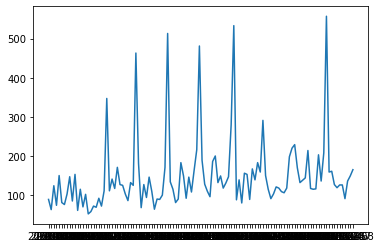

In [32]:
plt.plot(df_filter['기준년월'], df_filter['공용'])
# xtick 수를 줄인다. 년도별로 해도 괜찮을듯.!
plt.show()

In [33]:
# 왜 저런 그래프가 ?!
df_filter.head(60)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
60,일본,224475,1455,63,1172,3197,230362,2010-02,아시아,97.4,50.3
120,일본,299820,1483,124,519,4180,306126,2010-03,아시아,97.9,55.0
180,일본,233697,1282,74,154,3868,239075,2010-04,아시아,97.8,43.0
240,일본,233311,1480,150,216,6538,241695,2010-05,아시아,96.5,44.4
300,일본,226786,1236,81,358,3257,231718,2010-06,아시아,97.9,43.6
360,일본,221590,1279,76,323,4273,227541,2010-07,아시아,97.4,41.0
420,일본,254178,1616,103,1238,5022,262157,2010-08,아시아,97.0,43.8
480,일본,259846,1791,147,576,5526,267886,2010-09,아시아,97.0,47.5
540,일본,295488,1270,85,199,5528,302570,2010-10,아시아,97.7,44.9


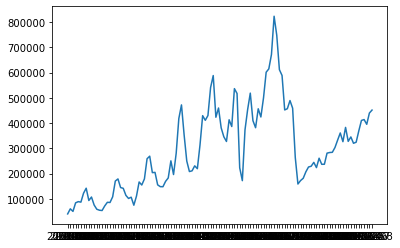

In [34]:
# 중국

import matplotlib.pyplot as plt

condition = (df['국적']=='중국')
df_filter = df[condition]

plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

시험 나올듯한거 뭐 예를 들어.  
 각 나라별로 가장 많이 관광객이 입국하는 월을 출력하라.

In [35]:
from matplotlib import font_manager,rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname= path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Check your OS system')

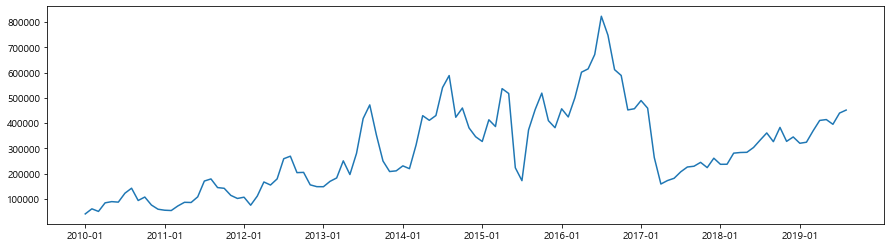

In [36]:
# 그래프 크기 조절
plt.figure(figsize =(15,4))
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
plt.show()

# 중국인들 여름에 많이 입국한다~~~

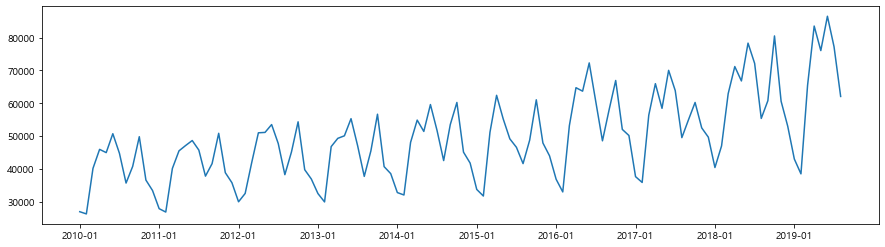

In [37]:
# 중국

import matplotlib.pyplot as plt

condition = (df['국적']=='미국')
df_filter = df[condition]
# 그래프 크기 조절
plt.figure(figsize =(15,4))
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
plt.show()
# 봄, 가을에 출입국 하는것 같다~~

24.05.27

In [38]:
cntry_list = ['중국','일본','대만','미국','홍콩']

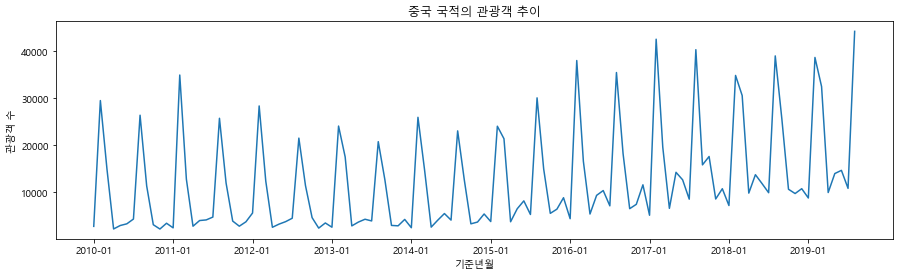

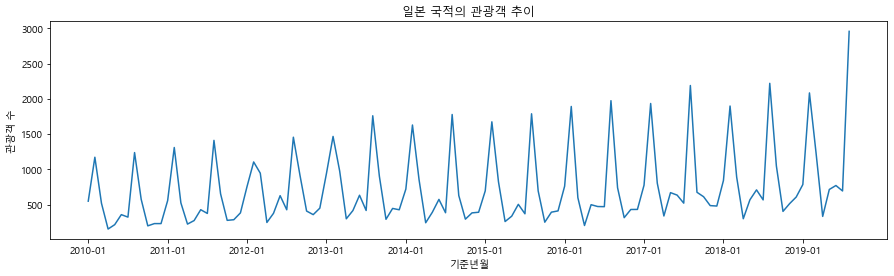

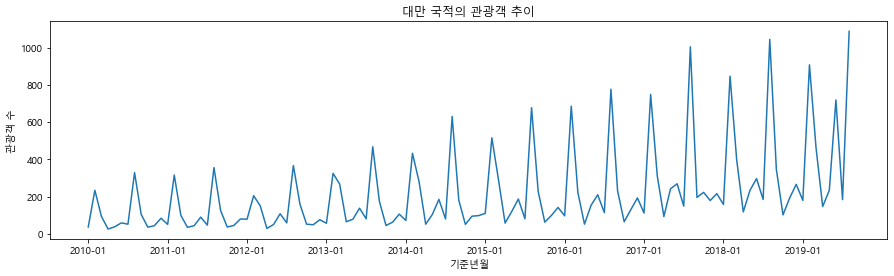

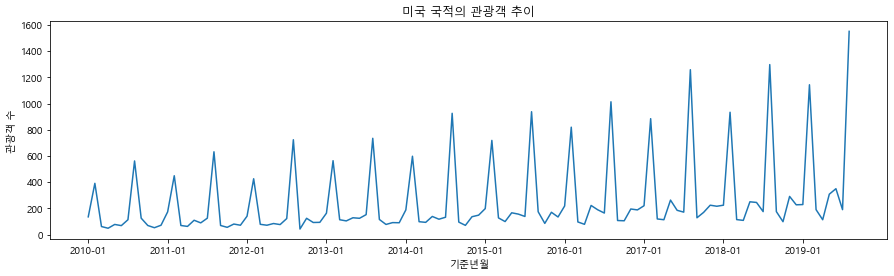

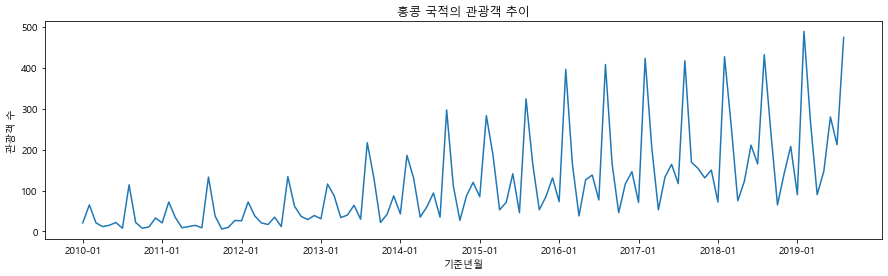

In [40]:
for cntry in cntry_list:
    # 국적 관광객 추출하기
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    # 그래프 그리기
    plt.figure(figsize =(15,4))
    plt.plot(df_filter['기준년월'], df_filter['유학/연수'])
    
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월'),
    plt.ylabel('관광객 수')
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
plt.show()

In [41]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [42]:
# str.slice() 함수 사용

In [43]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [45]:
# 중국 관광객 필터링

condition = (df['국적']== '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [47]:
# 피봇 테이블 써서 관광객 수랑 index는 년도로

df_pivot = df_filter.pivot_table(values='관광',index='년도',columns='월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


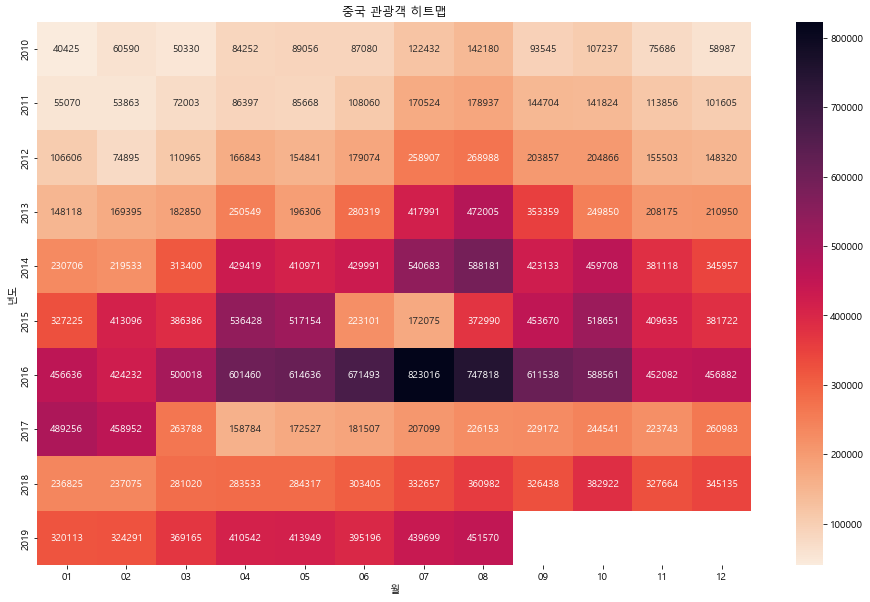

In [49]:
#히트맵

import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.title('중국 관광객 히트맵')
plt.show()

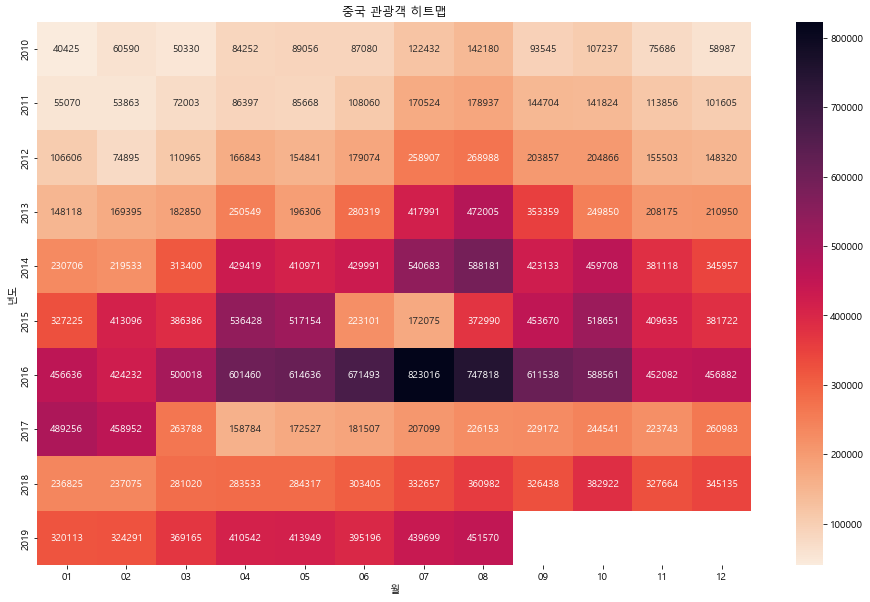

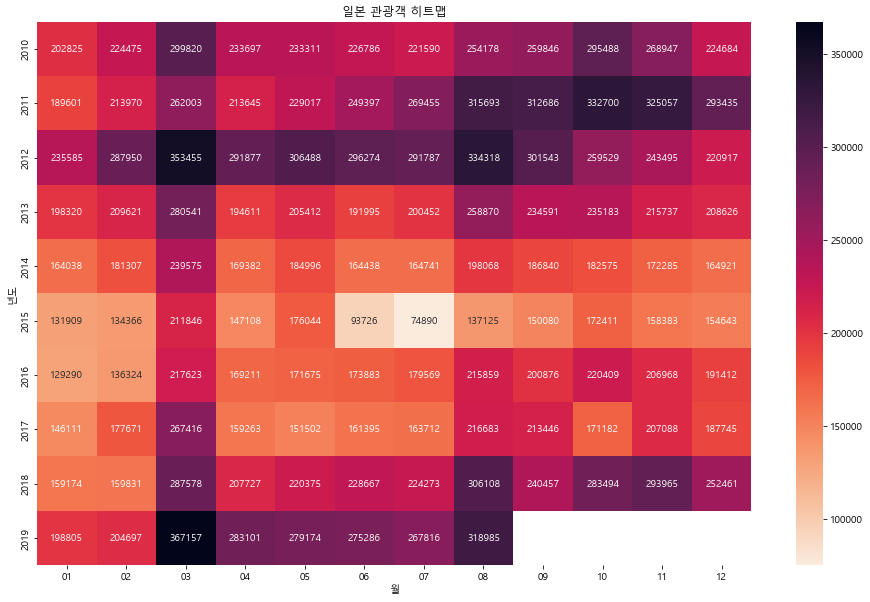

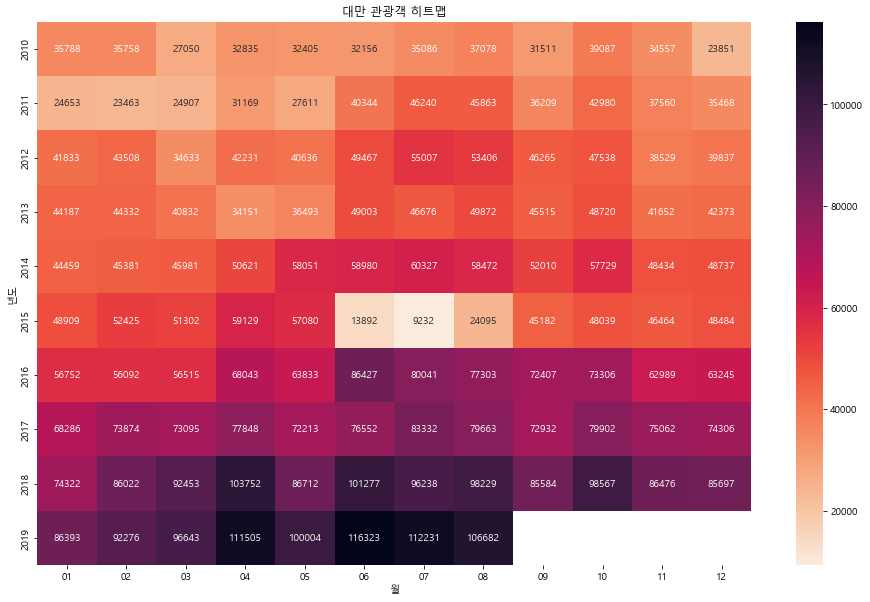

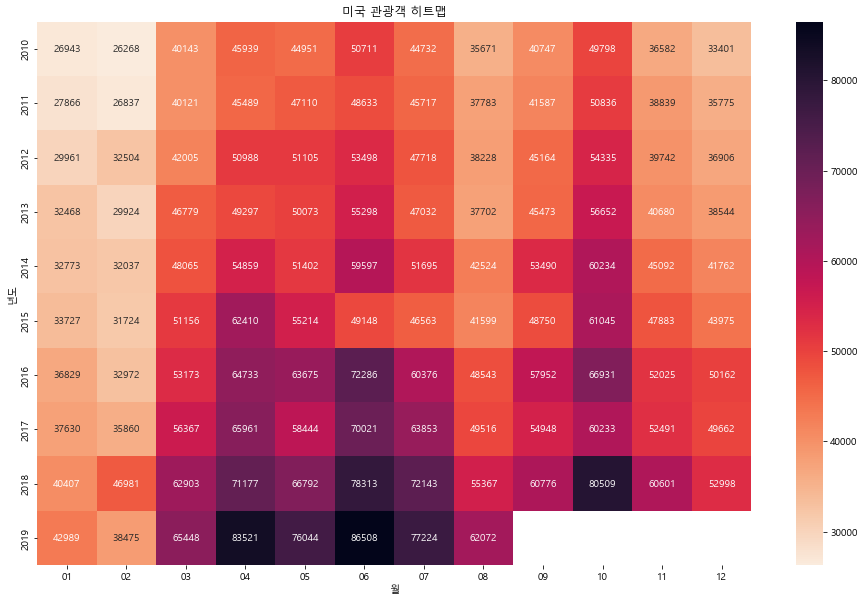

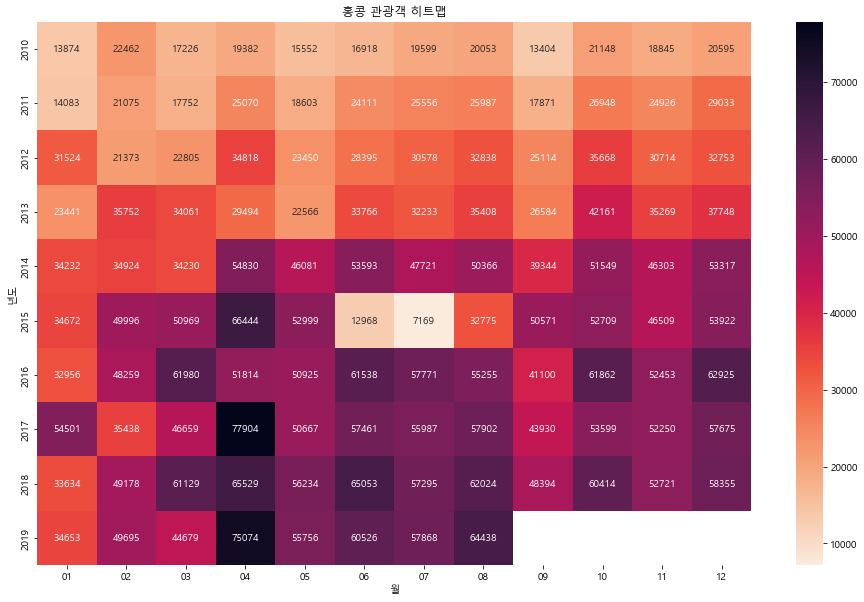

In [54]:
# cntry 각각 히트맵 그리기

for cntry in cntry_list:
    condition = (df['국적']== cntry)
    df_filter = df[condition]
    df_pivot = df_filter.pivot_table(values='관광',index='년도',columns='월')
    
    plt.figure(figsize=(16,10))
    plt.plot(df_filter['기준년월'],df_filter['관광'])
    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
    plt.title('{} 관광객 히트맵'.format(cntry))
plt.show()